In [69]:
# data analysis 
import pandas as pd
import numpy as np
import random as rnd
from sklearn.impute import SimpleImputer
from sklearn import preprocessing
import scipy.sparse as sp
import datetime as dt
from datetime import datetime
today = datetime.today()
# visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

pd.set_option('display.max_rows', None)

In [2]:
attend = pd.read_csv('I:\\Download\\Датасеты\\attend.csv')
groups = pd.read_csv('I:\\Download\\Датасеты\\groups.csv')

In [3]:
groups.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27003 entries, 0 to 27002
Data columns (total 10 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   уникальный номер                27003 non-null  int64 
 1   направление 1                   27003 non-null  object
 2   направление 2                   27003 non-null  object
 3   направление 3                   27003 non-null  object
 4   адрес площадки                  27003 non-null  object
 5   округ площадки                  23021 non-null  object
 6   район площадки                  23021 non-null  object
 7   расписание в активных периодах  6522 non-null   object
 8   расписание в закрытых периодах  21643 non-null  object
 9   расписание в плановом периоде   67 non-null     object
dtypes: int64(1), object(9)
memory usage: 2.1+ MB


In [4]:
groups = groups.rename(columns={"уникальный номер": "numgroup", "направление 1": "type1", "направление 2": "type2", "направление 3": "type3", 
                       "адрес площадки": "addres", "округ площадки": "okrug", "район площадки": "region", "расписание в активных периодах": "active_schedule",
                      "расписание в закрытых периодах": "end_schedule", "расписание в плановом периоде": "plan_schedule"})

In [5]:
groups.head()

,numgroup,type1,type2,type3,addres,okrug,region,active_schedule,end_schedule,plan_schedule
0,801357270,Физическая активность,ОФП,ОФП,"город Москва, Саратовская улица, дом 16, корпус 2",Юго-Восточный административный округ,муниципальный округ Текстильщики,NaN,"c 01.01.2023 по 31.03.2023, Пн., Ср. 19:10-20:...",NaN
1,801356857,Физическая активность,ОФП,ОФП,"город Москва, Подольская улица, дом 5",Юго-Восточный административный округ,муниципальный округ Марьино,NaN,"c 09.01.2023 по 31.03.2023, Вт., Чт. 10:00-11:...",NaN
2,801351684,Физическая активность,ОФП,ОФП,"г. Москва, Базовская улица, дом 15, строение 1...","Северный административный округ, Северный адми...","муниципальный округ Западное Дегунино, муницип...",NaN,"c 09.01.2023 по 31.03.2023, Вт., Чт. 19:00-20:...",NaN
3,801353683,Физическая активность,ОФП,ОФП,"город Москва, улица Обручева, дом 28А, город М...","Юго-Западный административный округ, Юго-Запад...","муниципальный округ Обручевский, муниципальный...",NaN,"c 09.01.2023 по 31.03.2023, Пн., Ср. 13:30-14:...",NaN
4,801352164,Физическая активность,ОФП,ОФП,"город Москва, Воронцовский парк, дом 3, город ...","Юго-Западный административный округ, Юго-Запад...","муниципальный округ Обручевский, муниципальный...",NaN,"c 10.01.2023 по 28.02.2023, Вт., Пт. 12:00-13:...",NaN


In [6]:
groups.isnull().sum()

numgroup               0
type1                  0
type2                  0
type3                  0
addres                 0
okrug               3982
region              3982
active_schedule    20481
end_schedule        5360
plan_schedule      26936
dtype: int64

In [7]:
attend.head()

,уникальный номер занятия,уникальный номер группы,уникальный номер участника,направление 2,направление 3,онлайн/офлайн,дата занятия,время начала занятия,время окончания занятия
0,401346550,801346550,101352023,ОНЛАЙН Гимнастика,ОНЛАЙН Цигун,Да,2022-08-01,09:00:00,10:00:00
1,401346550,801346550,101385462,ОНЛАЙН Гимнастика,ОНЛАЙН Цигун,Да,2022-08-01,09:00:00,10:00:00
2,401346550,801346550,101421897,ОНЛАЙН Гимнастика,ОНЛАЙН Цигун,Да,2022-08-01,09:00:00,10:00:00
3,401346550,801346550,101354499,ОНЛАЙН Гимнастика,ОНЛАЙН Цигун,Да,2022-08-01,09:00:00,10:00:00
4,401346550,801346550,101421312,ОНЛАЙН Гимнастика,ОНЛАЙН Цигун,Да,2022-08-01,09:00:00,10:00:00


In [8]:
#Переименовываю столбцы
attend = attend.rename(columns={"уникальный номер занятия": "numzan", "уникальный номер группы": "numgroup", "уникальный номер участника": "numclient",
                               "направление 2": "type2", "направление 3": "type3", "онлайн/офлайн": "online", "дата занятия": "date",
                               "время начала занятия": "time_begin", "время окончания занятия": "time_end"})
attend.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5901274 entries, 0 to 5901273
Data columns (total 9 columns):
 #   Column      Dtype 
---  ------      ----- 
 0   numzan      int64 
 1   numgroup    int64 
 2   numclient   int64 
 3   type2       object
 4   type3       object
 5   online      object
 6   date        object
 7   time_begin  object
 8   time_end    object
dtypes: int64(3), object(6)
memory usage: 405.2+ MB


In [9]:
#Смотрим пропущенные значения - пропущенных нет
attend.isnull().sum()

numzan        0
numgroup      0
numclient     0
type2         0
type3         0
online        0
date          0
time_begin    0
time_end      0
dtype: int64

In [10]:
#Значение Да/Нет преобразовываю в True/False
d = {'Нет':'No', 'Да':'Yes'}
attend['online'] = attend['online'].map(d)
attend.head()

,numzan,numgroup,numclient,type2,type3,online,date,time_begin,time_end
0,401346550,801346550,101352023,ОНЛАЙН Гимнастика,ОНЛАЙН Цигун,Yes,2022-08-01,09:00:00,10:00:00
1,401346550,801346550,101385462,ОНЛАЙН Гимнастика,ОНЛАЙН Цигун,Yes,2022-08-01,09:00:00,10:00:00
2,401346550,801346550,101421897,ОНЛАЙН Гимнастика,ОНЛАЙН Цигун,Yes,2022-08-01,09:00:00,10:00:00
3,401346550,801346550,101354499,ОНЛАЙН Гимнастика,ОНЛАЙН Цигун,Yes,2022-08-01,09:00:00,10:00:00
4,401346550,801346550,101421312,ОНЛАЙН Гимнастика,ОНЛАЙН Цигун,Yes,2022-08-01,09:00:00,10:00:00


In [11]:
attend['date'] = attend['date'].astype("datetime64[ns]") #Дату преобразовал в формат даты

In [12]:
columns_to_show = ['type2', 'type3', 'online']
attend.pivot_table(columns_to_show, ['numgroup'], aggfunc='count').head()

,online,type2,type3
numgroup,,,
801346549,30,30,30
801346550,855,855,855
801346551,451,451,451
801346552,388,388,388
801346553,2239,2239,2239


In [13]:
attend.numgroup.nunique() #Количество уникальных групп

24535

In [14]:
attend.numzan.nunique() #Количество уникальных занятий

647132

In [15]:
attend.numclient.nunique() #Уникальное количество пользователей всего

50906

In [16]:
# ТОП пользователей по группам 
attend\
    .groupby(['numclient', 'type2']) \
    .agg({'numgroup':'count'}) \
    .sort_values(by=['numgroup'], ascending=False).head() 

,,numgroup
numclient,type2,
101387204,ОНЛАЙН Художественно-прикладное творчество,743
101426166,ОНЛАЙН Рисование,628
101391680,ОНЛАЙН Рисование,621
101354085,ОНЛАЙН Художественно-прикладное творчество,569
101358683,ОНЛАЙН Рисование,567


In [17]:
# Количество пользователей посетивших различные занятия
attend.groupby(['type2', 'type3', 'online']).agg({"numclient": 'count'})\
    .sort_values(by=['numclient'], ascending=False).reset_index().head()

,type2,type3,online,numclient
0,ОНЛАЙН Красота и стиль,ОНЛАЙН Мастер-класс по уходу за кожей в зрелом...,Yes,413095
1,ОНЛАЙН Гимнастика,ОНЛАЙН Гимнастика,Yes,209704
2,Скандинавская ходьба,Скандинавская ходьба,No,182593
3,ОНЛАЙН Гимнастика,ОНЛАЙН Суставная гимнастика,Yes,173138
4,ОНЛАЙН Психология и коммуникации,ОНЛАЙН Психологические тренинги,Yes,145011


In [18]:
# ID пользователя с минимальной активностью за год
attend.groupby(['numclient'])['date'].nunique().idxmin()

101415587

In [19]:
# ID пользователя с максимальной активностью за год
attend.groupby(['numclient'])['date'].nunique().idxmax()

101420479

In [20]:
#Пользователь с максимальной активностью за год
attend.query('numclient == 101420479').groupby('type2').agg({'type3':'count'})\
    .sort_values(by=['type3'], ascending=False)

,type3
type2,
ОНЛАЙН Красота и стиль,229
ОНЛАЙН Гимнастика,146
ОНЛАЙН Здорово жить,127
ОНЛАЙН Психология и коммуникации,81
ОНЛАЙН ОФП,80


In [21]:
#Пользователь с минимальной активностью за год
attend.query('numclient == 101415587').groupby('type2').agg({'type3':'count'})\
    .sort_values(by=['type3'], ascending=False)

,type3
type2,
Информационные технологии,5


In [22]:
attend.groupby('online').agg({'numzan':'nunique'})\
    .sort_values(by=['numzan'], ascending=False).head()

,numzan
online,
No,412908
Yes,234224


In [23]:
print(f'''Занятий онлайн: {100*(234224/647132):.2f}%
Занятий офлайн: {100*(412908/647132):.2f}%''')

Занятий онлайн: 36.19%
Занятий офлайн: 63.81%


In [24]:
attend.groupby('online').agg({'numgroup':'nunique'})\
    .sort_values(by=['numgroup'], ascending=False).head()

,numgroup
online,
No,17185
Yes,7350


In [25]:
print(f'''Групп онлайн: {100*(7350/24535):.2f}%
Групп офлайн: {100*(17185/24535):.2f}%''')

Групп онлайн: 29.96%
Групп офлайн: 70.04%


In [26]:
# Онлайн программы по популярности
attend.query('online == "Yes"').groupby('type2').agg({'type3':'count'})\
    .sort_values(by=['type3'], ascending=False).head()

,type3
type2,
ОНЛАЙН Гимнастика,819496
ОНЛАЙН Красота и стиль,461259
ОНЛАЙН Здорово жить,346469
"ОНЛАЙН История, искусство, краеведение",294575
ОНЛАЙН Рисование,228054


In [27]:
# Офлайн программы по популярности
attend.query('online == "No"').groupby('type2').agg({'type3':'count'})\
    .sort_values(by=['type3'], ascending=False).head()

,type3
type2,
Гимнастика,408361
Танцы,223793
"Фитнес, тренажеры",210518
Скандинавская ходьба,182593
Спортивные игры,153462


In [28]:
#Смотрим за какой отрезок времени наш датасет - 333 дня - 1 год
attend['date'].max() - attend['date'].min()

Timedelta('333 days 00:00:00')

In [29]:
# Возвращаюсь к таблице groups
groups.head()

,numgroup,type1,type2,type3,addres,okrug,region,active_schedule,end_schedule,plan_schedule
0,801357270,Физическая активность,ОФП,ОФП,"город Москва, Саратовская улица, дом 16, корпус 2",Юго-Восточный административный округ,муниципальный округ Текстильщики,NaN,"c 01.01.2023 по 31.03.2023, Пн., Ср. 19:10-20:...",NaN
1,801356857,Физическая активность,ОФП,ОФП,"город Москва, Подольская улица, дом 5",Юго-Восточный административный округ,муниципальный округ Марьино,NaN,"c 09.01.2023 по 31.03.2023, Вт., Чт. 10:00-11:...",NaN
2,801351684,Физическая активность,ОФП,ОФП,"г. Москва, Базовская улица, дом 15, строение 1...","Северный административный округ, Северный адми...","муниципальный округ Западное Дегунино, муницип...",NaN,"c 09.01.2023 по 31.03.2023, Вт., Чт. 19:00-20:...",NaN
3,801353683,Физическая активность,ОФП,ОФП,"город Москва, улица Обручева, дом 28А, город М...","Юго-Западный административный округ, Юго-Запад...","муниципальный округ Обручевский, муниципальный...",NaN,"c 09.01.2023 по 31.03.2023, Пн., Ср. 13:30-14:...",NaN
4,801352164,Физическая активность,ОФП,ОФП,"город Москва, Воронцовский парк, дом 3, город ...","Юго-Западный административный округ, Юго-Запад...","муниципальный округ Обручевский, муниципальный...",NaN,"c 10.01.2023 по 28.02.2023, Вт., Пт. 12:00-13:...",NaN


In [30]:
groups.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27003 entries, 0 to 27002
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   numgroup         27003 non-null  int64 
 1   type1            27003 non-null  object
 2   type2            27003 non-null  object
 3   type3            27003 non-null  object
 4   addres           27003 non-null  object
 5   okrug            23021 non-null  object
 6   region           23021 non-null  object
 7   active_schedule  6522 non-null   object
 8   end_schedule     21643 non-null  object
 9   plan_schedule    67 non-null     object
dtypes: int64(1), object(9)
memory usage: 2.1+ MB


In [31]:
# Оставляю нужные столбцы
groups = groups.loc[:, ['numgroup', 'type1']]
groups.head()

,numgroup,type1
0,801357270,Физическая активность
1,801356857,Физическая активность
2,801351684,Физическая активность
3,801353683,Физическая активность
4,801352164,Физическая активность


In [32]:
groups.isnull().sum()

numgroup    0
type1       0
dtype: int64

In [33]:
# Сопоставил номера групп из groups c attend на предмет наличия в attend
groups['numgroup'].isin(attend['numgroup']).value_counts()

True     24535
False     2468
Name: numgroup, dtype: int64

In [34]:
# Сохранил в одельный датафрейм только те номера групп, которые есть в attend
plan = groups.loc[groups['numgroup'].isin(attend['numgroup'].unique())]

In [35]:
plan.shape

(24535, 2)

In [36]:
# Приступим к юзерам
users = pd.read_csv('I:/Download/Датасеты/users.csv')
users = users.rename(columns={"уникальный номер": "numclient", "дата создание личного дела": "datereg", 
                              "пол": "sex", "дата рождения": "datebirth", 
                       "адрес проживания": "address_live"})
users.head()

,numclient,datereg,sex,datebirth,address_live
0,101391104,2019-02-26 15:52:09.000,Женщина,1959-09-10,"город москва, константинова, дом 30"
1,101437383,2022-09-14 13:46:41.079,Женщина,1958-06-29,"г. москва, большая серпуховская улица, дом 40,..."
2,101351338,2018-03-19 18:34:58.000,Женщина,1956-08-28,"город москва, летчика грицевца, дом 10"
3,101354578,2018-03-22 13:19:42.000,Женщина,1939-05-19,"город москва, лобачевского, дом 76"
4,101411997,2019-12-17 12:29:25.481,Женщина,1951-03-02,"г. москва, улица вертолётчиков, дом 13"


In [37]:
# Сопоставим юзеров с юзерами в attend
users['numclient'].isin(attend['numclient']).value_counts()

True     50906
False     1428
Name: numclient, dtype: int64

In [38]:
# Оставлю только тех, кто есть в attend
users2 = users.loc[users['numclient'].isin(attend['numclient'].unique())]
users2.shape

(50906, 5)

In [39]:
# Проверим пустоту
users2.isnull().sum()

numclient       0
datereg         0
sex             0
datebirth       0
address_live    0
dtype: int64

In [40]:
# Начинаю собирать датасет для модели
users_attend = attend.merge(users2, on='numclient', how='outer')
users_attend.head()

,numzan,numgroup,numclient,type2,type3,online,date,time_begin,time_end,datereg,sex,datebirth,address_live
0,401346550,801346550,101352023,ОНЛАЙН Гимнастика,ОНЛАЙН Цигун,Yes,2022-08-01,09:00:00,10:00:00,2018-03-20 14:54:07.000,Женщина,1959-01-18,"город москва, кутузовский проспект, дом 19"
1,401348283,801346550,101352023,ОНЛАЙН Гимнастика,ОНЛАЙН Цигун,Yes,2022-08-03,09:00:00,10:00:00,2018-03-20 14:54:07.000,Женщина,1959-01-18,"город москва, кутузовский проспект, дом 19"
2,401351970,801346550,101352023,ОНЛАЙН Гимнастика,ОНЛАЙН Цигун,Yes,2022-08-08,09:00:00,10:00:00,2018-03-20 14:54:07.000,Женщина,1959-01-18,"город москва, кутузовский проспект, дом 19"
3,401355029,801350331,101352023,ОНЛАЙН Красота и стиль,ОНЛАЙН Мастер-класс по уходу за кожей в зрелом...,Yes,2022-08-08,18:30:00,19:30:00,2018-03-20 14:54:07.000,Женщина,1959-01-18,"город москва, кутузовский проспект, дом 19"
4,401355095,801346550,101352023,ОНЛАЙН Гимнастика,ОНЛАЙН Цигун,Yes,2022-08-10,09:00:00,10:00:00,2018-03-20 14:54:07.000,Женщина,1959-01-18,"город москва, кутузовский проспект, дом 19"


In [41]:
users_attend.info() # Посмотрим, какие признаки с каким типом данных

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5901274 entries, 0 to 5901273
Data columns (total 13 columns):
 #   Column        Dtype         
---  ------        -----         
 0   numzan        int64         
 1   numgroup      int64         
 2   numclient     int64         
 3   type2         object        
 4   type3         object        
 5   online        object        
 6   date          datetime64[ns]
 7   time_begin    object        
 8   time_end      object        
 9   datereg       object        
 10  sex           object        
 11  datebirth     object        
 12  address_live  object        
dtypes: datetime64[ns](1), int64(3), object(9)
memory usage: 630.3+ MB


In [42]:
users_attend.isnull().sum() # Пропущенных нет, все чисто

numzan          0
numgroup        0
numclient       0
type2           0
type3           0
online          0
date            0
time_begin      0
time_end        0
datereg         0
sex             0
datebirth       0
address_live    0
dtype: int64

In [43]:
#Дату преобразую в формат даты
users_attend['datebirth'] = users_attend['datebirth'].astype("datetime64[ns]")

In [44]:
# Исследуем объединенный датафрейм более детально
users_attend.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5901274 entries, 0 to 5901273
Data columns (total 13 columns):
 #   Column        Dtype         
---  ------        -----         
 0   numzan        int64         
 1   numgroup      int64         
 2   numclient     int64         
 3   type2         object        
 4   type3         object        
 5   online        object        
 6   date          datetime64[ns]
 7   time_begin    object        
 8   time_end      object        
 9   datereg       object        
 10  sex           object        
 11  datebirth     datetime64[ns]
 12  address_live  object        
dtypes: datetime64[ns](2), int64(3), object(8)
memory usage: 630.3+ MB


In [45]:
users_attend.sex.unique()

array(['Женщина', 'Мужчина'], dtype=object)

In [46]:
# Переименовываю значения признака sex 
sex = {'Женщина': 'Female', 'Мужчина': 'Male'}
users_attend['sex'] = users_attend['sex'].map(sex)
users_attend.head()

,numzan,numgroup,numclient,type2,type3,online,date,time_begin,time_end,datereg,sex,datebirth,address_live
0,401346550,801346550,101352023,ОНЛАЙН Гимнастика,ОНЛАЙН Цигун,Yes,2022-08-01,09:00:00,10:00:00,2018-03-20 14:54:07.000,Female,1959-01-18,"город москва, кутузовский проспект, дом 19"
1,401348283,801346550,101352023,ОНЛАЙН Гимнастика,ОНЛАЙН Цигун,Yes,2022-08-03,09:00:00,10:00:00,2018-03-20 14:54:07.000,Female,1959-01-18,"город москва, кутузовский проспект, дом 19"
2,401351970,801346550,101352023,ОНЛАЙН Гимнастика,ОНЛАЙН Цигун,Yes,2022-08-08,09:00:00,10:00:00,2018-03-20 14:54:07.000,Female,1959-01-18,"город москва, кутузовский проспект, дом 19"
3,401355029,801350331,101352023,ОНЛАЙН Красота и стиль,ОНЛАЙН Мастер-класс по уходу за кожей в зрелом...,Yes,2022-08-08,18:30:00,19:30:00,2018-03-20 14:54:07.000,Female,1959-01-18,"город москва, кутузовский проспект, дом 19"
4,401355095,801346550,101352023,ОНЛАЙН Гимнастика,ОНЛАЙН Цигун,Yes,2022-08-10,09:00:00,10:00:00,2018-03-20 14:54:07.000,Female,1959-01-18,"город москва, кутузовский проспект, дом 19"


In [47]:
# Количество мужчин и женщин
users_attend.groupby('sex').agg({'numclient':'nunique'})\
    .sort_values(by=['numclient'], ascending=False).head()

,numclient
sex,
Female,45971
Male,4935


In [48]:
print(f'''Мужчин: {100*(4935/50906):.2f}%
Женщин: {100*(45971/50906):.2f}%''')

Мужчин: 9.69%
Женщин: 90.31%


In [53]:
united = users_attend.merge(plan, on='numgroup', how='outer')

In [54]:
united.head()

,numzan,numgroup,numclient,type2,type3,online,date,time_begin,time_end,datereg,sex,datebirth,address_live,type1
0,401346550,801346550,101352023,ОНЛАЙН Гимнастика,ОНЛАЙН Цигун,Yes,2022-08-01,09:00:00,10:00:00,2018-03-20 14:54:07.000,Female,1959-01-18,"город москва, кутузовский проспект, дом 19",Физическая активность
1,401348283,801346550,101352023,ОНЛАЙН Гимнастика,ОНЛАЙН Цигун,Yes,2022-08-03,09:00:00,10:00:00,2018-03-20 14:54:07.000,Female,1959-01-18,"город москва, кутузовский проспект, дом 19",Физическая активность
2,401351970,801346550,101352023,ОНЛАЙН Гимнастика,ОНЛАЙН Цигун,Yes,2022-08-08,09:00:00,10:00:00,2018-03-20 14:54:07.000,Female,1959-01-18,"город москва, кутузовский проспект, дом 19",Физическая активность
3,401355095,801346550,101352023,ОНЛАЙН Гимнастика,ОНЛАЙН Цигун,Yes,2022-08-10,09:00:00,10:00:00,2018-03-20 14:54:07.000,Female,1959-01-18,"город москва, кутузовский проспект, дом 19",Физическая активность
4,401365374,801346550,101352023,ОНЛАЙН Гимнастика,ОНЛАЙН Цигун,Yes,2022-08-22,09:00:00,10:00:00,2018-03-20 14:54:07.000,Female,1959-01-18,"город москва, кутузовский проспект, дом 19",Физическая активность


In [55]:
united.shape

(5901274, 14)

In [57]:
united.columns

Index(['numzan', 'numgroup', 'numclient', 'type2', 'type3', 'online', 'date',
       'time_begin', 'time_end', 'datereg', 'sex', 'datebirth', 'address_live',
       'type1'],
      dtype='object')

In [60]:
united1 = united.loc[:,['numzan', 'numgroup', 'numclient', 'type1', 'type2', 'type3', 'online', 'date', 
           'sex', 'datebirth']]
united1.head()

,numzan,numgroup,numclient,type1,type2,type3,online,date,sex,datebirth
0,401346550,801346550,101352023,Физическая активность,ОНЛАЙН Гимнастика,ОНЛАЙН Цигун,Yes,2022-08-01,Female,1959-01-18
1,401348283,801346550,101352023,Физическая активность,ОНЛАЙН Гимнастика,ОНЛАЙН Цигун,Yes,2022-08-03,Female,1959-01-18
2,401351970,801346550,101352023,Физическая активность,ОНЛАЙН Гимнастика,ОНЛАЙН Цигун,Yes,2022-08-08,Female,1959-01-18
3,401355095,801346550,101352023,Физическая активность,ОНЛАЙН Гимнастика,ОНЛАЙН Цигун,Yes,2022-08-10,Female,1959-01-18
4,401365374,801346550,101352023,Физическая активность,ОНЛАЙН Гимнастика,ОНЛАЙН Цигун,Yes,2022-08-22,Female,1959-01-18


In [68]:
united1.groupby(['online', 'sex']).agg({'numclient':'nunique'})\
    .sort_values(by=['numclient'], ascending=False).head()

,,numclient
online,sex,
No,Female,35226
Yes,Female,26924
No,Male,4183
Yes,Male,1539


In [70]:
# Создаем столбец, в который записываем возраст пользователя
united1['age'] = united1['datebirth'].apply(
               lambda x: today.year - x.year - 
               ((today.month, today.day) < (x.month, x.day)) 
               )
united1.head()

,numzan,numgroup,numclient,type1,type2,type3,online,date,sex,datebirth,age
0,401346550,801346550,101352023,Физическая активность,ОНЛАЙН Гимнастика,ОНЛАЙН Цигун,Yes,2022-08-01,Female,1959-01-18,64
1,401348283,801346550,101352023,Физическая активность,ОНЛАЙН Гимнастика,ОНЛАЙН Цигун,Yes,2022-08-03,Female,1959-01-18,64
2,401351970,801346550,101352023,Физическая активность,ОНЛАЙН Гимнастика,ОНЛАЙН Цигун,Yes,2022-08-08,Female,1959-01-18,64
3,401355095,801346550,101352023,Физическая активность,ОНЛАЙН Гимнастика,ОНЛАЙН Цигун,Yes,2022-08-10,Female,1959-01-18,64
4,401365374,801346550,101352023,Физическая активность,ОНЛАЙН Гимнастика,ОНЛАЙН Цигун,Yes,2022-08-22,Female,1959-01-18,64


In [112]:
# Возрасты по полу
united1.groupby(['sex']).agg(
    min_age=('age','min'),
    max_age=('age','max'),
    avg_age=('age', 'mean'),
)

,min_age,max_age,avg_age
sex,,,
Female,42,96,67.487457
Male,42,96,70.034273


In [100]:
# Посчитаем количество женщин моложе 55 лет
age_fem_young = united1.loc[((united1['age'] <= 55) & (united1['sex'] == 'Female'))]
print(f'Количество женщин моложе 55 лет: {age_fem_young.numclient.nunique()} человек')

Количество женщин моложе 55 лет: 505 человек


In [101]:
# Количество мужчин моложе 60 лет
age_mal_young = united1.loc[((united1['age'] <= 60) & (united1['sex'] == 'Male'))]
print(f'Количество мужчин моложе 60 лет: {age_mal_young.numclient.nunique()} человек')

Количество мужчин моложе 60 лет: 216 человек


In [120]:
# Количество регистраций на мероприятия по месяцам
united1.groupby([pd.Grouper(freq="1M", key="date"), "sex"])[["numclient"]].nunique()

numclient
date       sex              
2022-04-30 Female      28923
           Male         2344
2022-05-31 Female      28517
           Male         2367
2022-06-30 Female      27353
           Male         2232
2022-07-31 Female      25365
           Male         1964
2022-08-31 Female      26186
           Male         1976
2022-09-30 Female      32556
           Male         2799
2022-10-31 Female      36560
           Male         3352
2022-11-30 Female      39349
           Male         3799
2022-12-31 Female      39675
           Male         3919
2023-01-31 Female      40759
           Male         4129
2023-02-28 Female      41894
           Male         4301

<Axes: xlabel='date'>

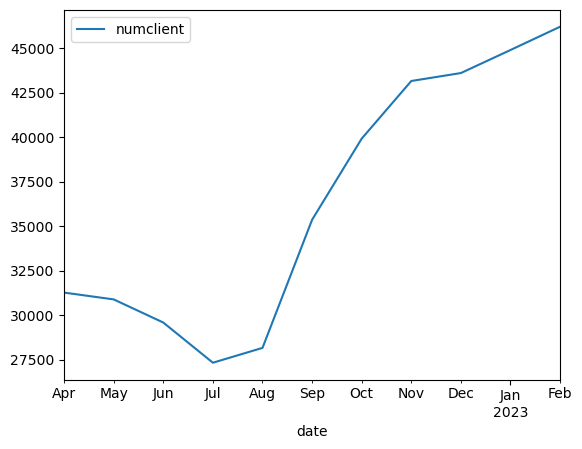

In [123]:
# Количество регистраций на мероприятия по месяцам - активность растет
united1.groupby([pd.Grouper(freq="1M", key="date")])[["numclient"]].nunique().plot(legend=True)

<Axes: xlabel='datebirth'>

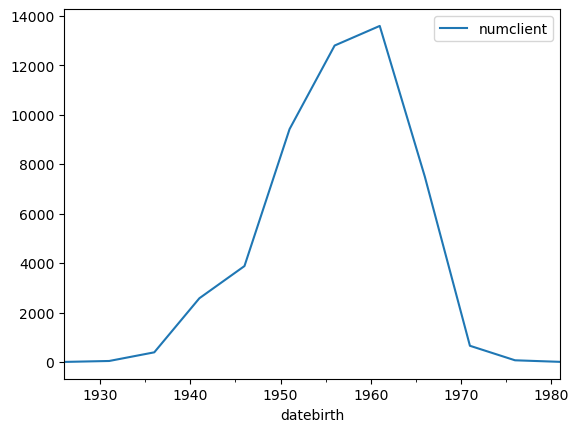

In [133]:
# Участники программы по годам рождения
united1.groupby([pd.Grouper(freq="5Y", key="datebirth")])[["numclient"]].nunique().plot(legend=True)

<Axes: xlabel='date'>

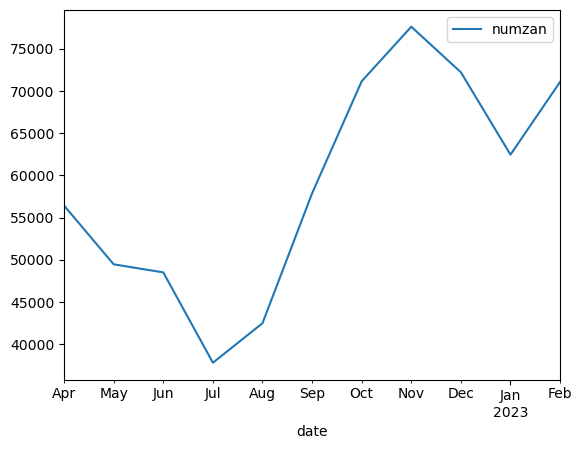

In [135]:
# Количество занятий - активностей - как меняется в течение года
united1.groupby([pd.Grouper(freq="1M", key="date")])[["numzan"]].nunique().plot(legend=True)

In [139]:
united1.head()

,numzan,numgroup,numclient,type1,type2,type3,online,date,sex,datebirth,age
0,401346550,801346550,101352023,Физическая активность,ОНЛАЙН Гимнастика,ОНЛАЙН Цигун,Yes,2022-08-01,Female,1959-01-18,64
1,401348283,801346550,101352023,Физическая активность,ОНЛАЙН Гимнастика,ОНЛАЙН Цигун,Yes,2022-08-03,Female,1959-01-18,64
2,401351970,801346550,101352023,Физическая активность,ОНЛАЙН Гимнастика,ОНЛАЙН Цигун,Yes,2022-08-08,Female,1959-01-18,64
3,401355095,801346550,101352023,Физическая активность,ОНЛАЙН Гимнастика,ОНЛАЙН Цигун,Yes,2022-08-10,Female,1959-01-18,64
4,401365374,801346550,101352023,Физическая активность,ОНЛАЙН Гимнастика,ОНЛАЙН Цигун,Yes,2022-08-22,Female,1959-01-18,64


In [140]:
united1.columns

Index(['numzan', 'numgroup', 'numclient', 'type1', 'type2', 'type3', 'online',
       'date', 'sex', 'datebirth', 'age'],
      dtype='object')

In [216]:
# df = united1.copy()
# df = df.astype({'type1' : 'category', 'type2' : 'category'})
# df.info()

In [204]:
united_m = united1.drop_duplicates (subset=['numgroup', 'type2'])
united_m = united_m.loc[:,['numgroup', 'type2']]
united_m.head()

,numgroup,type2
0,801346550,ОНЛАЙН Гимнастика
855,801350331,ОНЛАЙН Красота и стиль
3328,801349666,ОФП
3812,801349670,Скандинавская ходьба
4311,801351049,ОНЛАЙН Домоводство


In [215]:
types = united_m['type2']
types.describe()

count          24535
unique            81
top       Гимнастика
freq            2668
Name: type2, dtype: object

In [159]:
united_v = united1.loc[:,['numclient', 'numgroup', 'type2']]
united_v = united_v.drop_duplicates (subset=['numgroup', 'type2'])
united_v.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24535 entries, 0 to 5901273
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   numclient  24535 non-null  int64 
 1   numgroup   24535 non-null  int64 
 2   type2      24535 non-null  object
dtypes: int64(2), object(1)
memory usage: 766.7+ KB


In [160]:
test = pd.read_csv('I:/Download/Датасеты/test.csv')
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 2 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   уникальный номер участника  200 non-null    int64  
 1   уникальный номер группы     0 non-null      float64
dtypes: float64(1), int64(1)
memory usage: 3.2 KB


In [164]:
test['уникальный номер участника'].isin(united_v['numclient']).value_counts()

False    123
True      77
Name: уникальный номер участника, dtype: int64

In [165]:
mod1 = united_m.copy()
mod1.head()

,numgroup,type2
0,801346550,ОНЛАЙН Гимнастика
855,801350331,ОНЛАЙН Красота и стиль
3328,801349666,ОФП
3812,801349670,Скандинавская ходьба
4311,801351049,ОНЛАЙН Домоводство


In [166]:
mod2 = united_v.copy()
mod2.head()

,numclient,numgroup,type2
0,101352023,801346550,ОНЛАЙН Гимнастика
855,101352023,801350331,ОНЛАЙН Красота и стиль
3328,101352023,801349666,ОФП
3812,101352023,801349670,Скандинавская ходьба
4311,101352023,801351049,ОНЛАЙН Домоводство


In [231]:
import category_encoders as ce

In [232]:
united2 = united1.select_dtypes(include=['object']).copy()
united2.head()

,type1,type2,type3,online,sex
0,Физическая активность,ОНЛАЙН Гимнастика,ОНЛАЙН Цигун,Yes,Female
1,Физическая активность,ОНЛАЙН Гимнастика,ОНЛАЙН Цигун,Yes,Female
2,Физическая активность,ОНЛАЙН Гимнастика,ОНЛАЙН Цигун,Yes,Female
3,Физическая активность,ОНЛАЙН Гимнастика,ОНЛАЙН Цигун,Yes,Female
4,Физическая активность,ОНЛАЙН Гимнастика,ОНЛАЙН Цигун,Yes,Female


In [243]:
un = united_m.copy()
print(un.shape)

(24535, 2)


In [252]:
encoder = ce.BackwardDifferenceEncoder(cols=["type2"])
encoder.fit(un, verbose=1)

C:\Users\oigla\anaconda3\lib\site-packages\category_encoders\base_contrast_encoder.py:126: FutureWarning: Intercept column might not be added anymore in future releases (c.f. issue #370)
  warnings.warn("Intercept column might not be added anymore in future releases (c.f. issue #370)",


BackwardDifferenceEncoder(cols=['type2'],
                          mapping=[{'col': 'type2',
                                    'mapping':       type2_0   type2_1   type2_2   type2_3   type2_4   type2_5  type2_6  \
 1  -0.987654 -0.975309 -0.962963 -0.950617 -0.938272 -0.925926 -0.91358   
 2   0.012346 -0.975309 -0.962963 -0.950617 -0.938272 -0.925926 -0.91358   
 3   0.012346  0.024691 -0.962963 -0.950617 -0.938272 -0.925926 -0.91358   
 4   0.012346  0.024691  0.037037 -0.950617 -0.93...
 78   0.91358  0.925926  0.938272  0.950617 -0.037037 -0.024691 -0.012346  
 79   0.91358  0.925926  0.938272  0.950617  0.962963 -0.024691 -0.012346  
 80   0.91358  0.925926  0.938272  0.950617  0.962963  0.975309 -0.012346  
 81   0.91358  0.925926  0.938272  0.950617  0.962963  0.975309  0.987654  
-1    0.00000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  
-2    0.00000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  

[83 rows x 80 columns]}])

In [253]:
un2 = encoder.fit_transform(un, verbose=1).iloc[:,0:14]

C:\Users\oigla\anaconda3\lib\site-packages\category_encoders\base_contrast_encoder.py:126: FutureWarning: Intercept column might not be added anymore in future releases (c.f. issue #370)
  warnings.warn("Intercept column might not be added anymore in future releases (c.f. issue #370)",
C:\Users\oigla\anaconda3\lib\site-packages\category_encoders\base_contrast_encoder.py:126: FutureWarning: Intercept column might not be added anymore in future releases (c.f. issue #370)
  warnings.warn("Intercept column might not be added anymore in future releases (c.f. issue #370)",


In [255]:
un2.head()

,intercept,numgroup,type2_0,type2_1,type2_2,type2_3,type2_4,type2_5,type2_6,type2_7,type2_8,type2_9,type2_10,type2_11
0,1,801346550,-0.987654,-0.975309,-0.962963,-0.950617,-0.938272,-0.925926,-0.91358,-0.901235,-0.888889,-0.876543,-0.864198,-0.851852
855,1,801350331,0.012346,-0.975309,-0.962963,-0.950617,-0.938272,-0.925926,-0.91358,-0.901235,-0.888889,-0.876543,-0.864198,-0.851852
3328,1,801349666,0.012346,0.024691,-0.962963,-0.950617,-0.938272,-0.925926,-0.91358,-0.901235,-0.888889,-0.876543,-0.864198,-0.851852
3812,1,801349670,0.012346,0.024691,0.037037,-0.950617,-0.938272,-0.925926,-0.91358,-0.901235,-0.888889,-0.876543,-0.864198,-0.851852
4311,1,801351049,0.012346,0.024691,0.037037,0.049383,-0.938272,-0.925926,-0.91358,-0.901235,-0.888889,-0.876543,-0.864198,-0.851852


In [256]:
col_list= list(un2)
col_list

['intercept',
 'numgroup',
 'type2_0',
 'type2_1',
 'type2_2',
 'type2_3',
 'type2_4',
 'type2_5',
 'type2_6',
 'type2_7',
 'type2_8',
 'type2_9',
 'type2_10',
 'type2_11']

In [260]:
col_list.remove('intercept')

In [261]:
col_list.remove('numgroup')

In [262]:
col_list

['type2_0',
 'type2_1',
 'type2_2',
 'type2_3',
 'type2_4',
 'type2_5',
 'type2_6',
 'type2_7',
 'type2_8',
 'type2_9',
 'type2_10',
 'type2_11']

In [265]:
un2['row_sum'] = un2[col_list].sum (axis=1)
un2.columns

Index(['intercept', 'numgroup', 'type2_0', 'type2_1', 'type2_2', 'type2_3',
       'type2_4', 'type2_5', 'type2_6', 'type2_7', 'type2_8', 'type2_9',
       'type2_10', 'type2_11', 'row_sum'],
      dtype='object')

In [267]:
un2.loc[:,['numgroup','row_sum']].head()

,numgroup,row_sum
0,801346550,-11.037037
855,801350331,-10.037037
3328,801349666,-9.037037
3812,801349670,-8.037037
4311,801351049,-7.037037


In [271]:
un2.row_sum.max()

0.962962962962963